In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = '/content/Stock_data.csv'
df_stock = pd.read_csv(path,)
df_stock

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.234920,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.235210,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.234350,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.234910,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.236800,1.238700,1.236285,1.238205
...,...,...,...,...,...,...
12885,11.12.2020 04:00:00.000,19540.2200,1.607955,1.608915,1.604095,1.605455
12886,11.12.2020 08:00:00.000,48969.4700,1.605465,1.611820,1.605225,1.609935
12887,11.12.2020 12:00:00.000,49848.5000,1.609930,1.611365,1.606575,1.606745
12888,11.12.2020 16:00:00.000,23094.5300,1.606720,1.609540,1.605880,1.607315


In [ ]:
print(df_stock.columns)


Index(['Gmt time', 'Volume', 'Open', 'High', 'Low', 'Close'], dtype='object')


Please enter the start date (YYYY-MM-DD): 2012
Please enter the end date (YYYY-MM-DD): 2013


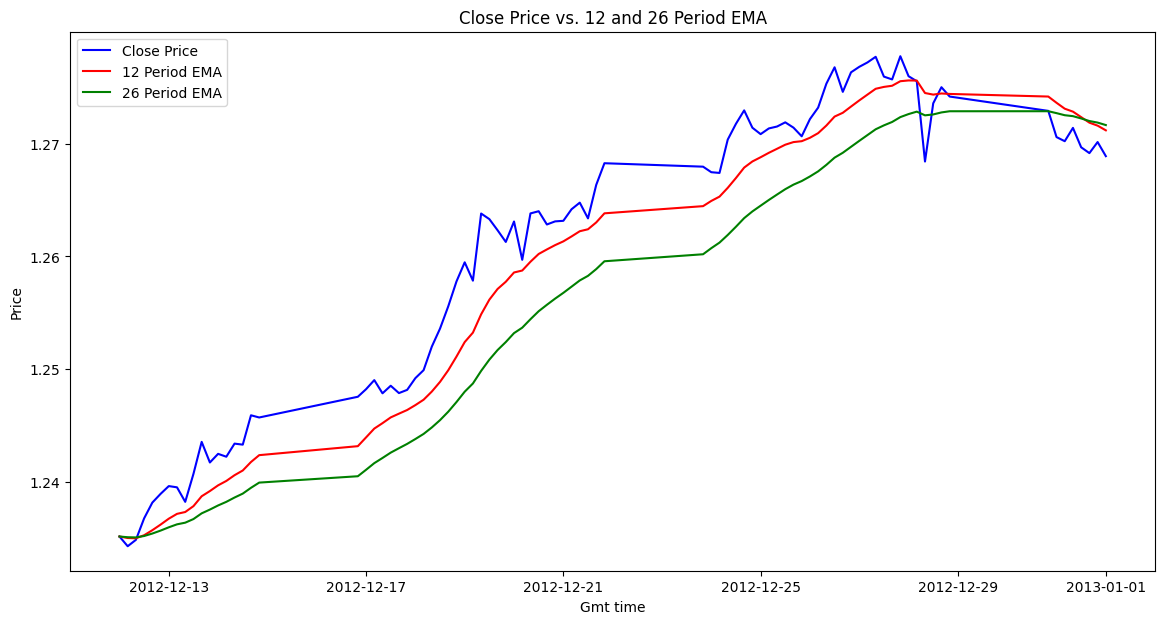

In [ ]:


df_stock['Gmt time'] = pd.to_datetime(df_stock['Gmt time'])


start_date = input("Please enter the start date (YYYY-MM-DD): ")
end_date = input("Please enter the end date (YYYY-MM-DD): ")

filtered_df = df_stock.loc[(df_stock['Gmt time'] >= start_date) & (df_stock['Gmt time'] <= end_date)].copy()


filtered_df['12_period_EMA'] = filtered_df['Close'].ewm(span=12, adjust=False).mean()
filtered_df['26_period_EMA'] = filtered_df['Close'].ewm(span=26, adjust=False).mean()


plt.figure(figsize=(14, 7))
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
plt.plot(filtered_df['Gmt time'], filtered_df['12_period_EMA'], label='12 Period EMA', color='red')
plt.plot(filtered_df['Gmt time'], filtered_df['26_period_EMA'], label='26 Period EMA', color='green')
plt.title('Close Price vs. 12 and 26 Period EMA')
plt.legend()
plt.xlabel('Gmt time')
plt.ylabel('Price')
plt.grid(False)
plt.show()
